Loading weights: 100%|██████████| 396/396 [00:06<00:00, 64.68it/s, Materializing param=visual_projection.weight]
StableDiffusionSafetyChecker LOAD REPORT from: /home/tran_thien/.cache/huggingface/hub/models--stable-diffusion-v1-5--stable-diffusion-v1-5/snapshots/451f4fe16113bff5a5d2269ed5ad43b0592e9a14/safety_checker
Key                                               | Status     |  | 
--------------------------------------------------+------------+--+-
vision_model.vision_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
Loading weights: 100%|██████████| 196/196 [00:02<00:00, 75.80it/s, Materializing param=text_model.final_layer_norm.weight] 
CLIPTextModel LOAD REPORT from: /home/tran_thien/.cache/huggingface/hub/models--stable-diffusion-v1-5--stable-diffusion-v1-5/snapshots/451f4fe16113bff5a5d2269ed5ad43b0592e9a14/text_encoder
Key                                | Sta

Đang khởi tạo ma thuật AI...


100%|██████████| 50/50 [04:09<00:00,  4.99s/it]
/home/tran_thien/miniconda3/envs/interior_ai/lib/python3.10/site-packages/diffusers/image_processor.py:148: RuntimeWarning: invalid value encountered in cast
  images = (images * 255).round().astype("uint8")
Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


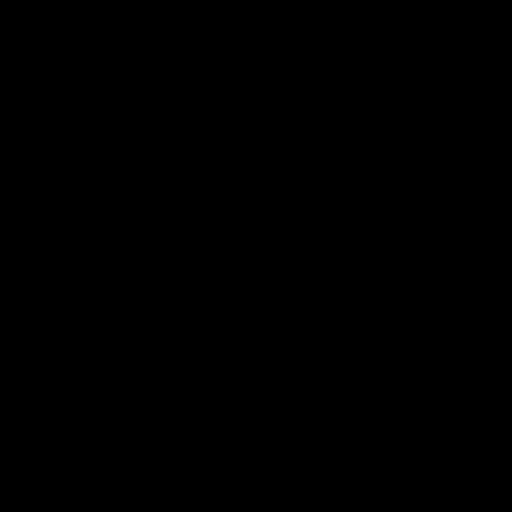

In [ ]:
import torch
from diffusers import StableDiffusionPipeline

# 1. Load model (vẫn dùng float16 cho nhẹ VRAM)
model_id = "stable-diffusion-v1-5/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16, 
    use_safetensors=True
)

# --- THUỐC ĐẶC TRỊ SỐ 1: Vô hiệu hóa Safety Checker ---
# Giúp bỏ qua lỗi "Potential NSFW" và tiết kiệm RAM
pipe.safety_checker = None
pipe.feature_extractor = None

# Đưa model vào GPU
pipe = pipe.to("cuda")

# --- THUỐC ĐẶC TRỊ SỐ 2: Sửa lỗi RuntimeWarning (Ảnh đen/NaN) ---
# VAE (bộ phận vẽ pixel cuối cùng) rất nhạy cảm, ép nó chạy float32 để không bị lỗi
pipe.vae.enable_slicing()
pipe.vae.enable_tiling()
pipe.vae = pipe.vae.to(torch.float32)

# --- CẤU HÌNH TỐC ĐỘ ---
# Giảm số bước từ 50 xuống 30 (vẫn đẹp mà nhanh hơn gấp đôi)
prompt = "A high-end modern minimalist living room, wooden floor, large windows, sunset lighting, 8k resolution"
negative_prompt = "blurry, low quality, ugly, dark, deformed"

print("Đang vẽ lại... (Chờ khoảng 20-30 giây thôi nhé)")

# Bật chế độ autocast để GPU chạy mượt nhất
with torch.autocast("cuda"):
    image = pipe(
        prompt, 
        negative_prompt=negative_prompt,
        num_inference_steps=30,  # Giảm xuống 30 bước cho nhanh
        guidance_scale=7.5
    ).images[0]

# Hiển thị ảnh
display(image)

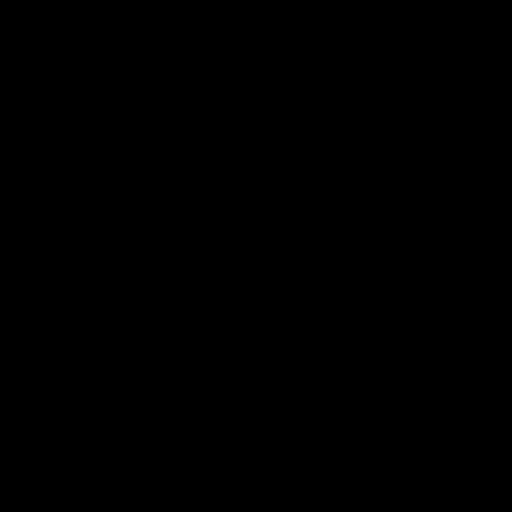

In [3]:
display(image)